In [ ]:
#importing the pandas and other relevant modules and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Dataset

In [ ]:
# importing the Delhivery dataset

url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181'
data = pd.read_csv(url)
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# checking the datatypes of the imported data

data.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   data                            object 
 1   trip_creation_time              object 
 2   route_schedule_uuid             object 
 3   route_type                      object 
 4   trip_uuid                       object 
 5   source_center                   object 
 6   source_name                     object 
 7   destination_center              object 
 8   destination_name                object 
 9   od_start_time                   object 
 10  od_end_time                     object 
 11  start_scan_to_end_scan          float64
 12  is_cutoff                       bool   
 13  cutoff_factor                   int64  
 14  cutoff_timestamp                object 
 15  actual_distance_to_destination  float64
 16  actual_time                     float64
 17  osrm_time                    

In [ ]:
data['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [ ]:
# checking the number of groups for the trip creation time and trip uuid

print(data.groupby(['trip_creation_time']).ngroups, data.groupby(['trip_uuid']).ngroups)

14817 14817


In [ ]:
# finding the level of detail of the dataset

print(data.shape[0])
data.groupby(['route_schedule_uuid', 'trip_uuid', 'source_center', 'destination_center']).nunique().sum().sort_values(ascending = False)

144867


segment_osrm_distance             144860
actual_distance_to_destination    144601
osrm_distance                     143331
cutoff_factor                     143180
cutoff_timestamp                  142999
actual_time                       142950
factor                            142357
osrm_time                         142257
segment_factor                    136226
segment_actual_time               116349
segment_osrm_time                 104147
is_cutoff                          50804
start_scan_to_end_scan             26369
od_end_time                        26369
od_start_time                      26369
trip_creation_time                 26368
route_type                         26368
data                               26368
source_name                        26302
destination_name                   26287
dtype: int64

### Level of Detail for the Dataset

**route_schedule_uuid -> trip_uuid -> source_center + destination_center**

*Each group will result in a single trip which is split into sevaral short trip based on the cut off factor for the distance*

In [ ]:
# od_start_time and od_end_time columns can be dropped, since we can get the time taken for the trip from the actual_time column
# start_scan_to_end_scan can be dropped, since actual_distance_to_destination will give the distance data
# is_cutoff - used to figure out where the trip is completed or not.
# trip creation time corresponds to the trip uuid and can be dropped
# data column is not relevant for analysis.
# removing the columns with Unknown field
cols_to_drop = ['data', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']

data.drop(cols_to_drop, axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_schedule_uuid             144867 non-null  object 
 2   route_type                      144867 non-null  object 
 3   trip_uuid                       144867 non-null  object 
 4   source_center                   144867 non-null  object 
 5   source_name                     144574 non-null  object 
 6   destination_center              144867 non-null  object 
 7   destination_name                144606 non-null  object 
 8   od_start_time                   144867 non-null  object 
 9   od_end_time                     144867 non-null  object 
 10  actual_distance_to_destination  144867 non-null  float64
 11  actual_time                     144867 non-null  float64
 12  osrm_time       

In [ ]:
# finding the columns with the date time type and correcting the data type

date_cols = ['trip_creation_time', 'od_start_time' , 'od_end_time']
data[date_cols] = data[date_cols].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_schedule_uuid             144867 non-null  object        
 2   route_type                      144867 non-null  object        
 3   trip_uuid                       144867 non-null  object        
 4   source_center                   144867 non-null  object        
 5   source_name                     144574 non-null  object        
 6   destination_center              144867 non-null  object        
 7   destination_name                144606 non-null  object        
 8   od_start_time                   144867 non-null  datetime64[ns]
 9   od_end_time                     144867 non-null  datetime64[ns]
 10  actual_distance_to_destination  144867 non-null  float64

In [ ]:
# finding the range of the dataset

first_date = data['trip_creation_time'].dt.date.min()
last_date = data['trip_creation_time'].dt.date.max()
period = last_date- first_date

print(f'The data is from {first_date} to {last_date} for a period of {period.days} days')

The data is from 2018-09-12 to 2018-10-03 for a period of 21 days


## Time and Distance

*   `actual_distance_to_destination` is the ***`cumulative`*** actual distance from one rest stop to the next rest stop.
*   `osrm_distance` is the ***`cumulative`*** osrm distance from one rest stop to the next rest stop.
*   `segment_osrm_distance` is the osrm distance between the rest stops.


*   `actual_time` is the ***`cumulative`*** actual time taken from one rest stop to the next rest stop. This is the ***`cumulative`*** sum of `segment_actual_time`
*   `osrm_time` is the ***`cumulative`*** osrm time taken from one rest stop to the next rest stop. This is the ***`cumulative`*** sum of `segment_osrm_time`
*   `segment_actual_time` is the actual time taken from one rest stop to the next rest stop.
*   `segment_osrm_time` is the osrm time taken from one rest stop to the next rest stop.


In [ ]:
# renaming distance and time columns for better understanding

data.rename(columns = {
    'actual_distance_to_destination' : 'actual_distance',
}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_creation_time     144867 non-null  datetime64[ns]
 1   route_schedule_uuid    144867 non-null  object        
 2   route_type             144867 non-null  object        
 3   trip_uuid              144867 non-null  object        
 4   source_center          144867 non-null  object        
 5   source_name            144574 non-null  object        
 6   destination_center     144867 non-null  object        
 7   destination_name       144606 non-null  object        
 8   od_start_time          144867 non-null  datetime64[ns]
 9   od_end_time            144867 non-null  datetime64[ns]
 10  actual_distance        144867 non-null  float64       
 11  actual_time            144867 non-null  float64       
 12  osrm_time              144867 non-null  floa

In [ ]:
# finding the number of records with null value for source name and destination name

# creating a new dataframe with the source center and destination center
source = data[['source_center', 'source_name']].copy().rename({'source_center' : 'center', 'source_name' : 'name'}, axis = 1)
destination = data[['destination_center', 'destination_name']].copy().rename({'destination_center' : 'center', 'destination_name' : 'name'}, axis = 1)

city_center = pd.concat([source, destination])
city_center.groupby(['center'])['name'].nunique().max()

1

In [ ]:
# we can't fill the missing city names, since we can't find city names for the same city center in the whole data set.
# so we drop the records with missing city name

data.dropna(subset=['source_name', 'destination_name'], inplace = True, axis = 0)
data.info()  #we see that all the rows are having the data now after dropping these records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_creation_time     144316 non-null  datetime64[ns]
 1   route_schedule_uuid    144316 non-null  object        
 2   route_type             144316 non-null  object        
 3   trip_uuid              144316 non-null  object        
 4   source_center          144316 non-null  object        
 5   source_name            144316 non-null  object        
 6   destination_center     144316 non-null  object        
 7   destination_name       144316 non-null  object        
 8   od_start_time          144316 non-null  datetime64[ns]
 9   od_end_time            144316 non-null  datetime64[ns]
 10  actual_distance        144316 non-null  float64       
 11  actual_time            144316 non-null  float64       
 12  osrm_time              144316 non-null  floa

## Segment Level Dataset

In [ ]:
# creating a unique identifier for trip segments

data['segment_key'] = data['trip_uuid'] + "_" + data['source_center'] + "_" + data['destination_center']

In [ ]:
# calculating the cumulative time and distance based on the segment values

data[['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']] = data.groupby(['segment_key'])[['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']].cumsum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_creation_time     144316 non-null  datetime64[ns]
 1   route_schedule_uuid    144316 non-null  object        
 2   route_type             144316 non-null  object        
 3   trip_uuid              144316 non-null  object        
 4   source_center          144316 non-null  object        
 5   source_name            144316 non-null  object        
 6   destination_center     144316 non-null  object        
 7   destination_name       144316 non-null  object        
 8   od_start_time          144316 non-null  datetime64[ns]
 9   od_end_time            144316 non-null  datetime64[ns]
 10  actual_distance        144316 non-null  float64       
 11  actual_time            144316 non-null  float64       
 12  osrm_time              144316 non-null  floa

In [ ]:
#grouping the records based on the segment key and aggregating the features

create_segment_dict = {
    'trip_creation_time' : 'min',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_name' : 'first',
    'destination_name' : 'first',
    'od_start_time' : 'min',
    'od_end_time' : 'max',
    'actual_distance' : 'max',
    'actual_time' : 'max',
    'osrm_time' : 'max',
    'osrm_distance' : 'max',
    'segment_actual_time' : 'max',
    'segment_osrm_distance' : 'max',
    'segment_osrm_time' : 'max',
}

segment_data = data.groupby(['segment_key']).aggregate(create_segment_dict).reset_index().sort_values(['segment_key', 'od_end_time'], ascending = [True, True])
segment_data.head(5)

,segment_key,trip_creation_time,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,trip-153671041653548748_IND209304AAA_IND000000ACB,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,242.309306,611.0,212.0,281.2109,608.0,317.7408,231.0


In [ ]:
# creating a new feature for the difference of the Trip start time and end time

segment_data['od_time_diff_hour'] = (segment_data['od_end_time'] - segment_data['od_start_time']).apply(lambda x : x.components.hours)
segment_data.drop(['od_end_time', 'od_start_time'], axis = 1, inplace = True)

In [ ]:
# extract the city and the state from the source and destination

segment_data['source_city'] = segment_data['source_name'].apply(lambda x: x.split("_")[0])
segment_data['source_state'] = segment_data['source_name'].apply(lambda name : name[name.find("(") + 1 : -1])
segment_data['destination_city'] = segment_data['destination_name'].apply(lambda x: x.split("_")[0])
segment_data['destination_state'] = segment_data['destination_name'].apply(lambda name : name[name.find("(") + 1 : -1])

In [ ]:
segment_data['trip_year'] = segment_data['trip_creation_time'].dt.year
segment_data['trip_month'] = segment_data['trip_creation_time'].dt.month
segment_data['trip_day'] = segment_data['trip_creation_time'].dt.day

In [ ]:
# removing the source name, destination name and trip_creation_time columns from the dataset

segment_data.drop(['source_name', 'destination_name', 'trip_creation_time', 'segment_key'], axis = 1, inplace = True)

In [ ]:
segment_data.head(5)

,route_type,trip_uuid,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_year,trip_month,trip_day
0,FTL,trip-153671041653548748,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0,21,Kanpur,Uttar Pradesh,Gurgaon,Haryana,2018,9,12
1,FTL,trip-153671041653548748,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0,16,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh,2018,9,12
2,Carting,trip-153671042288605164,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,0,Doddablpur,Karnataka,Chikblapur,Karnataka,2018,9,12
3,Carting,trip-153671042288605164,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,2,Tumkur,Karnataka,Doddablpur,Karnataka,2018,9,12
4,FTL,trip-153671043369099517,242.309306,611.0,212.0,281.2109,608.0,317.7408,231.0,13,Gurgaon,Haryana,Chandigarh,Punjab,2018,9,12


## Trip Level Dataset

In [ ]:
#grouping the records based on the segment key and aggregating the features

create_trip_dict = {
    'route_type' : 'first',
    'actual_distance' : 'sum',
    'actual_time' : 'max',
    'osrm_time' : 'max',
    'osrm_distance' : 'max',
    'segment_actual_time' : 'sum',
    'segment_osrm_distance' : 'sum',
    'segment_osrm_time' : 'sum',
    'od_time_diff_hour' : 'mean',
    'trip_year' : 'mean',
    'trip_month' : 'mean',
    'trip_day' : 'mean'
}

trip_data = segment_data.groupby(['trip_uuid']).aggregate(create_trip_dict).reset_index().sort_values(['trip_uuid'])
trip_data.head(5)

,trip_uuid,route_type,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,trip_year,trip_month,trip_day
0,trip-153671041653548748,FTL,824.732854,830.0,394.0,544.8027,1548.0,1320.4733,1008.0,18.500000,2018.0,9.0,12.0
1,trip-153671042288605164,Carting,73.186911,96.0,42.0,56.9116,141.0,84.1894,65.0,1.000000,2018.0,9.0,12.0
2,trip-153671043369099517,FTL,1932.273969,2736.0,1529.0,2090.8743,3308.0,2545.2678,1941.0,8.000000,2018.0,9.0,12.0
3,trip-153671046011330457,Carting,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,1.000000,2018.0,9.0,12.0
4,trip-153671052974046625,FTL,127.448500,147.0,46.0,63.6461,340.0,146.7919,115.0,3.666667,2018.0,9.0,12.0


## Visualisation

In [ ]:
# stacking the features for visualisation into feature-value pair

numeric_columns = trip_data.select_dtypes(include = 'number').iloc[:, :-4]
numeric_columns_names = numeric_columns.columns
numeric_columns = numeric_columns.stack().reset_index(level = 1)
numeric_columns.columns = ['features', 'values']
numeric_columns.head(10)

,features,values
0,actual_distance,824.732854
0,actual_time,830.000000
0,osrm_time,394.000000
0,osrm_distance,544.802700
0,segment_actual_time,1548.000000
0,segment_osrm_distance,1320.473300
0,segment_osrm_time,1008.000000
1,actual_distance,73.186911
1,actual_time,96.000000
1,osrm_time,42.000000


<Axes: xlabel='values', ylabel='Density'>

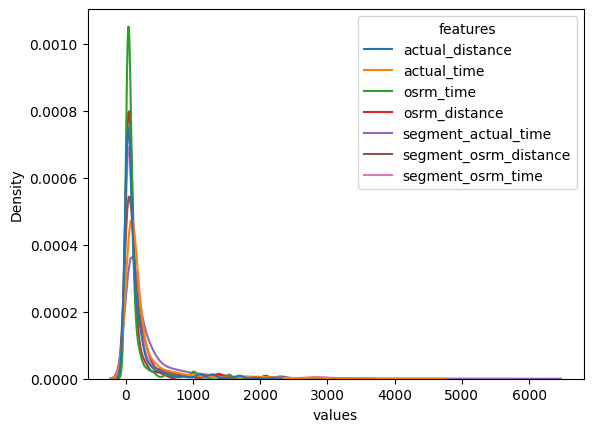

In [ ]:
# kde plot to see the distribution of the dataset

sns.kdeplot(numeric_columns, x = 'values', hue = 'features')

In [ ]:
# most of the values lie in the left region, the data is righ-skewed.
# conveting the dataset to their log values for analysis

temp_data = trip_data[numeric_columns_names].apply(np.log)

temp_data_plot = temp_data.stack().reset_index(level = 1)
temp_data_plot.columns = ['features', 'values']
temp_data_plot.head(10)

,features,values
0,actual_distance,6.715060
0,actual_time,6.721426
0,osrm_time,5.976351
0,osrm_distance,6.300424
0,segment_actual_time,7.344719
0,segment_osrm_distance,7.185746
0,segment_osrm_time,6.915723
1,actual_distance,4.293017
1,actual_time,4.564348
1,osrm_time,3.737670


<Axes: xlabel='values', ylabel='Density'>

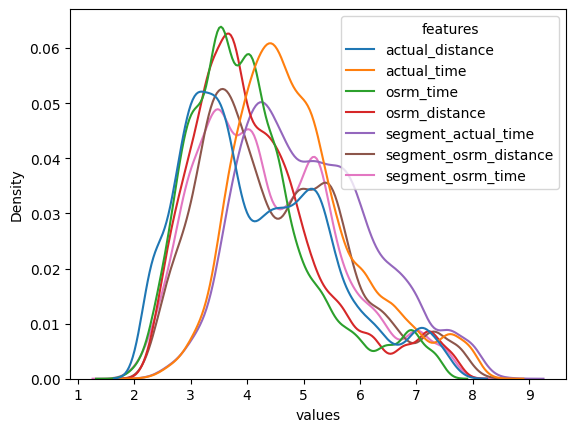

In [ ]:
sns.kdeplot(temp_data_plot, x = 'values', hue = 'features')

<Axes: xlabel='features', ylabel='values'>

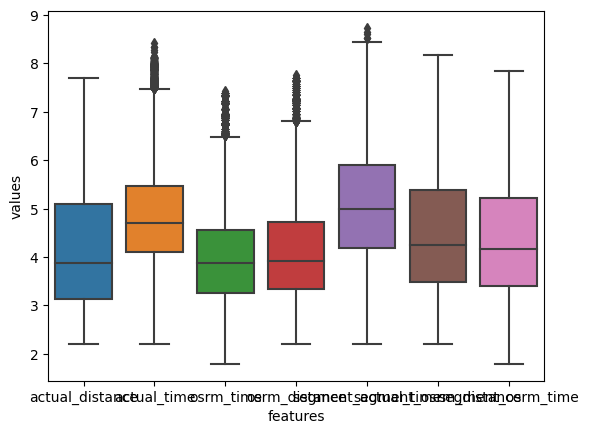

In [ ]:
# finding the outliers using the box plot IQR method

sns.boxplot(temp_data_plot, y = 'values', x = 'features')

In [ ]:
# changing the values to log values
trip_data[numeric_columns_names] = temp_data

# function to detect the outliers
def IRQ_outlier(column_data):
  q1 = column_data.quantile(0.25)
  q3 = column_data.quantile(0.75)

  iqr = q3 - q1
  outlier_index = []

  for index, val in enumerate(column_data):
    if val < q1 - 1.5*iqr or val > q3 + 1.5*iqr:
      outlier_index.append(index)

  return outlier_index

# Removing the outliers using IQR method
for feature in numeric_columns_names:
  trip_data.drop(index = IRQ_outlier(trip_data[feature]), inplace = True)
  trip_data.reset_index(drop = True, inplace = True)

trip_data.head(5)

,trip_uuid,route_type,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,trip_year,trip_month,trip_day
0,trip-153671041653548748,FTL,6.715060,6.721426,5.976351,6.300424,7.344719,7.185746,6.915723,18.500000,2018.0,9.0,12.0
1,trip-153671042288605164,Carting,4.293017,4.564348,3.737670,4.041499,4.948760,4.433069,4.174387,1.000000,2018.0,9.0,12.0
2,trip-153671046011330457,Carting,2.843471,4.077537,2.708050,2.979603,4.077537,2.989543,2.772589,1.000000,2018.0,9.0,12.0
3,trip-153671052974046625,FTL,4.847712,4.990433,3.828641,4.153338,5.828946,4.989016,4.744932,3.666667,2018.0,9.0,12.0
4,trip-153671055416136166,Carting,3.202626,3.688879,2.484907,2.786399,4.094345,3.334513,3.135494,1.500000,2018.0,9.0,12.0


In [ ]:
# one-hot encoding for the route_type

trip_data_encoded = pd.get_dummies(trip_data, columns = ['route_type'])
trip_data_encoded.head()

,trip_uuid,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,trip_year,trip_month,trip_day,route_type_Carting,route_type_FTL
0,trip-153671041653548748,6.715060,6.721426,5.976351,6.300424,7.344719,7.185746,6.915723,18.500000,2018.0,9.0,12.0,0,1
1,trip-153671042288605164,4.293017,4.564348,3.737670,4.041499,4.948760,4.433069,4.174387,1.000000,2018.0,9.0,12.0,1,0
2,trip-153671046011330457,2.843471,4.077537,2.708050,2.979603,4.077537,2.989543,2.772589,1.000000,2018.0,9.0,12.0,1,0
3,trip-153671052974046625,4.847712,4.990433,3.828641,4.153338,5.828946,4.989016,4.744932,3.666667,2018.0,9.0,12.0,0,1
4,trip-153671055416136166,3.202626,3.688879,2.484907,2.786399,4.094345,3.334513,3.135494,1.500000,2018.0,9.0,12.0,1,0


In [ ]:
# normalizing the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(trip_data_encoded.iloc[:,1:])
trip_data_scaled = pd.DataFrame(scaled_data, columns = trip_data_encoded.columns[1:])
trip_data_scaled.head(5)

,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,trip_year,trip_month,trip_day,route_type_Carting,route_type_FTL
0,0.907909,0.861666,0.949156,0.964624,0.933023,0.909929,0.907533,0.804348,0.0,0.0,0.37931,0.0,1.0
1,0.421143,0.450835,0.441375,0.432526,0.498737,0.407015,0.422000,0.043478,0.0,0.0,0.37931,1.0,0.0
2,0.129823,0.358119,0.207835,0.182392,0.340821,0.143283,0.173720,0.043478,0.0,0.0,0.37931,1.0,0.0
3,0.532622,0.531986,0.462009,0.458870,0.658277,0.508587,0.523052,0.159420,0.0,0.0,0.37931,0.0,1.0
4,0.202004,0.284096,0.157221,0.136882,0.343868,0.206309,0.237996,0.065217,0.0,0.0,0.37931,1.0,0.0


In [ ]:
trip_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   actual_distance        13948 non-null  float64
 1   actual_time            13948 non-null  float64
 2   osrm_time              13948 non-null  float64
 3   osrm_distance          13948 non-null  float64
 4   segment_actual_time    13948 non-null  float64
 5   segment_osrm_distance  13948 non-null  float64
 6   segment_osrm_time      13948 non-null  float64
 7   od_time_diff_hour      13948 non-null  float64
 8   trip_year              13948 non-null  float64
 9   trip_month             13948 non-null  float64
 10  trip_day               13948 non-null  float64
 11  route_type_Carting     13948 non-null  float64
 12  route_type_FTL         13948 non-null  float64
dtypes: float64(13)
memory usage: 1.4 MB


## Hypothesis Testing

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
# ttest - paired sample testing
sig_level = 0.05

def ttest(sample1, sample2, sig_level):
  stat, p_value = ttest_rel(sample1, sample2)
  print(f'P-value for this t-test is {np.round(p_value,5)}')
  if p_value > sig_level:
    print('Failed to reject the null hypothesis')
  else:
    print('Reject the null hypothesis')

### actual_time and osrm_time

In [ ]:
print('t-test between actual_time and osrm_time')
print('Null Hypothesis - Actual Time and OSRM time are significantly same')
print('Alternate Hypothesis - Actual Time and OSRM time are significantly different')
sample = trip_data_scaled[['actual_time', 'osrm_time']].sample(1000)
ttest(sample.iloc[:,0], sample.iloc[:,1], sig_level)

t-test between actual_time and osrm_time
Null Hypothesis - Actual Time and OSRM time are significantly same
Alternate Hypothesis - Actual Time and OSRM time are significantly different
P-value for this t-test is 0.03361
Reject the null hypothesis


### actual_distance and osrm_distance

In [ ]:
print('t-test between actual_distance and osrm_distance')
print('Null Hypothesis - Actual Distance and OSRM distance are significantly same')
print('Alternate Hypothesis - Actual Distance and OSRM distance are significantly different')
sample = trip_data_scaled[['actual_distance', 'osrm_distance']].sample(1000)
ttest(sample.iloc[:,0], sample.iloc[:,1], sig_level)

t-test between actual_distance and osrm_distance
Null Hypothesis - Actual Distance and OSRM distance are significantly same
Alternate Hypothesis - Actual Distance and OSRM distance are significantly different
P-value for this t-test is 0.0
Reject the null hypothesis


### segment_actual_time and segment_osrm_time

In [ ]:
print('t-test between segment_actual_time and segment_osrm_time')
print('Null Hypothesis - Segment Actual Time and Segment OSRM time are significantly same')
print('Alternate Hypothesis - Segment Actual Time and Segment OSRM time are significantly different')
sample = trip_data_scaled[['segment_actual_time', 'segment_osrm_time']].sample(1000)
ttest(sample.iloc[:,0], sample.iloc[:,1], sig_level)

t-test between segment_actual_time and segment_osrm_time
Null Hypothesis - Segment Actual Time and Segment OSRM time are significantly same
Alternate Hypothesis - Segment Actual Time and Segment OSRM time are significantly different
P-value for this t-test is 0.0
Reject the null hypothesis


## Analysis

In [ ]:
segment_data.head(5)

,route_type,trip_uuid,actual_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,od_time_diff_hour,source_city,source_state,destination_city,destination_state,trip_year,trip_month,trip_day
0,FTL,trip-153671041653548748,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0,21,Kanpur,Uttar Pradesh,Gurgaon,Haryana,2018,9,12
1,FTL,trip-153671041653548748,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0,16,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh,2018,9,12
2,Carting,trip-153671042288605164,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,0,Doddablpur,Karnataka,Chikblapur,Karnataka,2018,9,12
3,Carting,trip-153671042288605164,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,2,Tumkur,Karnataka,Doddablpur,Karnataka,2018,9,12
4,FTL,trip-153671043369099517,242.309306,611.0,212.0,281.2109,608.0,317.7408,231.0,13,Gurgaon,Haryana,Chandigarh,Punjab,2018,9,12


In [ ]:
top_interstate_transfers = segment_data[segment_data['source_state'] != segment_data['destination_state']].groupby(['source_state', 'destination_state'])[['trip_uuid', 'actual_time', 'actual_distance']].aggregate({'trip_uuid' : 'size', 'actual_distance': 'mean' , 'actual_time' : 'mean'
}).sort_values(by = ['trip_uuid'], ascending = False).reset_index().head(10)
top_interstate_transfers

,source_state,destination_state,trip_uuid,actual_distance,actual_time
0,Delhi,Haryana,451,39.703400,125.259424
1,Haryana,Delhi,315,45.723337,127.717460
2,Haryana,Uttar Pradesh,140,116.942232,274.400000
3,Uttar Pradesh,Haryana,130,196.592827,379.384615
4,Chandigarh,Punjab,121,32.038387,109.876033
5,Delhi,Uttar Pradesh,110,135.870987,281.318182
6,Haryana,Punjab,103,190.168023,376.262136
7,Uttar Pradesh,Delhi,93,94.116098,231.870968
8,Andhra Pradesh,Telangana,92,271.106417,483.967391
9,Haryana,Rajasthan,85,168.566521,304.964706


In [ ]:
top_city_transfers = segment_data[segment_data['source_city'] != segment_data['destination_city']].groupby(['source_city', 'destination_city'])[['trip_uuid', 'actual_time', 'actual_distance']].aggregate({'trip_uuid' : 'size', 'actual_distance': 'mean' , 'actual_time' : 'mean'
}).sort_values(by = ['trip_uuid'], ascending = False).reset_index().head(10)
top_city_transfers

,source_city,destination_city,trip_uuid,actual_distance,actual_time
0,Bangalore,Bengaluru,492,27.753005,77.674797
1,Bhiwandi,Mumbai,407,22.601039,80.120393
2,Bengaluru,Bangalore,356,28.356927,91.264045
3,Mumbai,Bhiwandi,282,21.347746,93.890071
4,Delhi,Gurgaon,248,40.521289,146.020161
5,Gurgaon,Delhi,237,45.934485,118.004219
6,Mumbai Hub (Maharashtra),Mumbai,227,16.341634,56.938326
7,MAA,Chennai,204,31.266697,83.617647
8,Chennai,MAA,141,30.084618,77.822695
9,Bengaluru,HBR Layout PC (Karnataka),111,17.206713,46.738739


In [ ]:
# replacing Bangalore with Bengalore

segment_data.replace('Bangalore', 'Bengaluru', inplace = True)
top_city_transfers = segment_data[segment_data['source_city'] != segment_data['destination_city']].groupby(['source_city', 'destination_city'])[['trip_uuid', 'actual_time', 'actual_distance']].aggregate({'trip_uuid' : 'size', 'actual_distance': 'mean' , 'actual_time' : 'mean'
}).sort_values(by = ['trip_uuid'], ascending = False).reset_index().head(10)
top_city_transfers

,source_city,destination_city,trip_uuid,actual_distance,actual_time
0,Bhiwandi,Mumbai,407,22.601039,80.120393
1,Mumbai,Bhiwandi,282,21.347746,93.890071
2,Delhi,Gurgaon,248,40.521289,146.020161
3,Gurgaon,Delhi,237,45.934485,118.004219
4,Mumbai Hub (Maharashtra),Mumbai,227,16.341634,56.938326
5,MAA,Chennai,204,31.266697,83.617647
6,Chennai,MAA,141,30.084618,77.822695
7,Bengaluru,HBR Layout PC (Karnataka),133,18.303029,49.428571
8,Pune,Bhiwandi,107,100.882221,218.766355
9,Bhiwandi,Mumbai Hub (Maharashtra),105,21.425833,61.285714


<Axes: xlabel='trip_day', ylabel='count'>

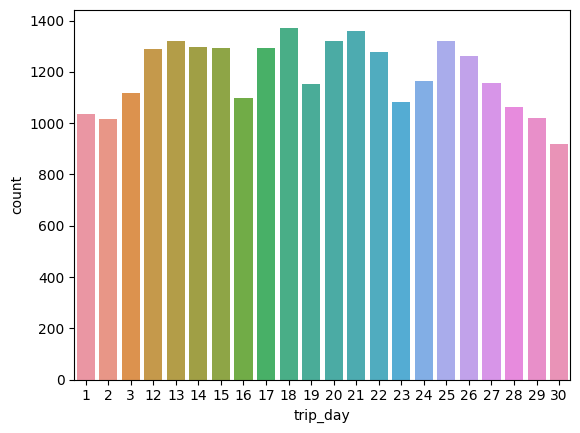

In [ ]:
sns.countplot(segment_data, x = 'trip_day')

<Axes: xlabel='route_type', ylabel='count'>

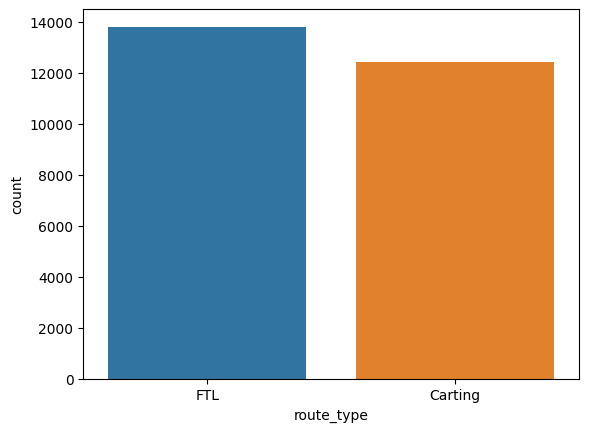

In [ ]:
sns.countplot(segment_data, x = 'route_type')

<Axes: xlabel='count', ylabel='source_state'>

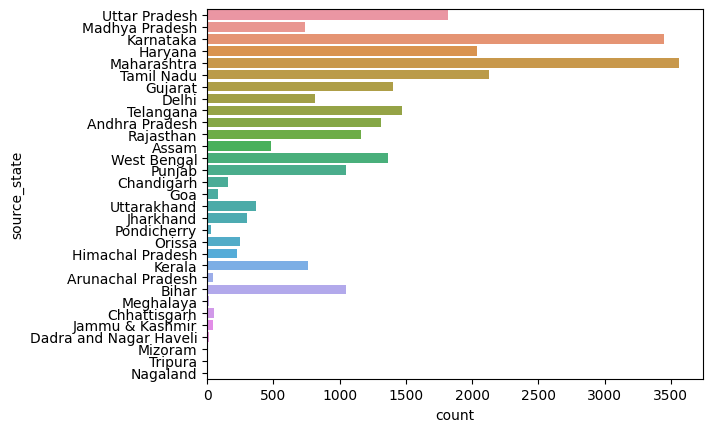

In [ ]:
sns.countplot(segment_data, y = 'source_state')

<Axes: xlabel='count', ylabel='destination_state'>

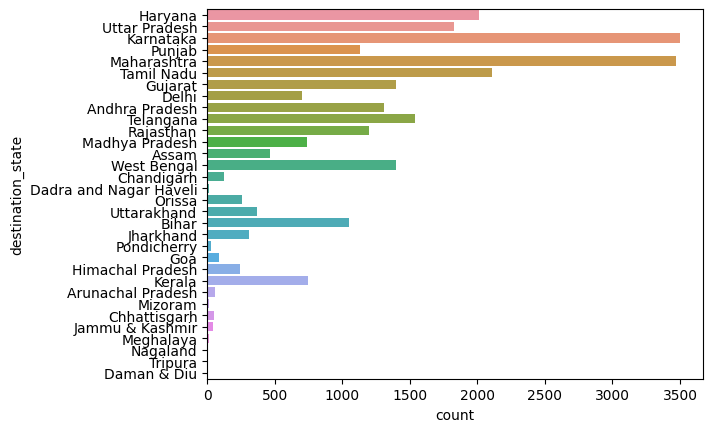

In [ ]:
sns.countplot(segment_data, y = 'destination_state')

<Axes: xlabel='trip_day'>

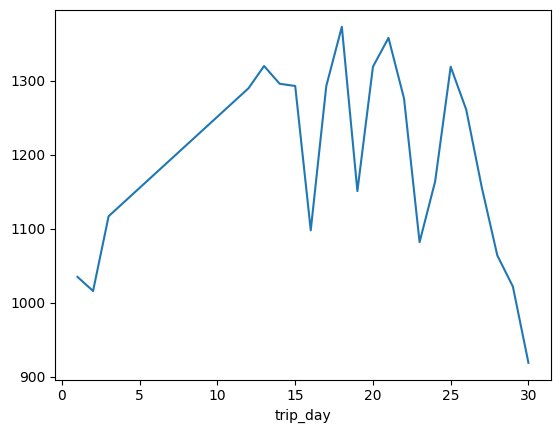

In [ ]:
sns.lineplot(segment_data.groupby('trip_day').size())

<Axes: xlabel='trip_day', ylabel='actual_distance'>

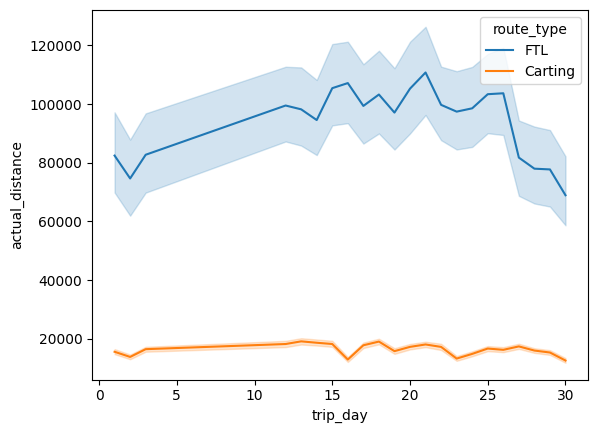

In [ ]:
sns.lineplot(segment_data, x = 'trip_day', y = 'actual_distance', estimator = 'sum', hue = 'route_type')

<Axes: xlabel='trip_day', ylabel='actual_time'>

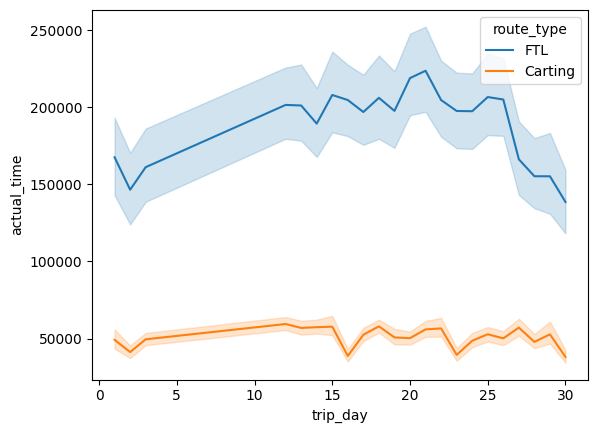

In [ ]:
sns.lineplot(segment_data, x = 'trip_day', y = 'actual_time', estimator = 'sum', hue = 'route_type')

<Axes: xlabel='trip_day', ylabel='speed'>

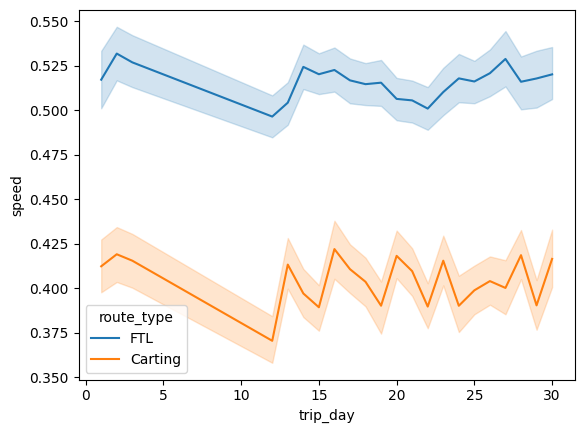

In [ ]:
segment_data['speed'] = segment_data['actual_distance'] / segment_data['actual_time']
sns.lineplot(segment_data, x = 'trip_day', y = 'speed', estimator = 'mean', hue = 'route_type')

<Axes: xlabel='trip_day', ylabel='value'>

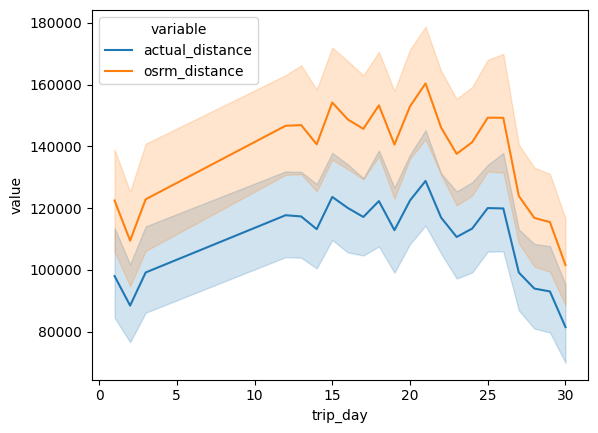

In [ ]:
sns.lineplot(pd.melt(segment_data[['actual_distance', 'osrm_distance', 'trip_day']], id_vars = ['trip_day']) , x = 'trip_day', y = 'value', estimator = 'sum', hue = 'variable')

<Axes: xlabel='trip_day', ylabel='value'>

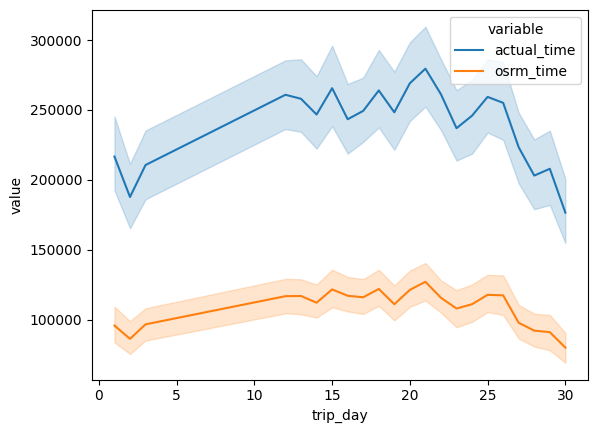

In [ ]:
sns.lineplot(pd.melt(segment_data[['actual_time', 'osrm_time', 'trip_day']], id_vars = ['trip_day']) , x = 'trip_day', y = 'value', estimator = 'sum', hue = 'variable')

<Axes: xlabel='trip_day', ylabel='value'>

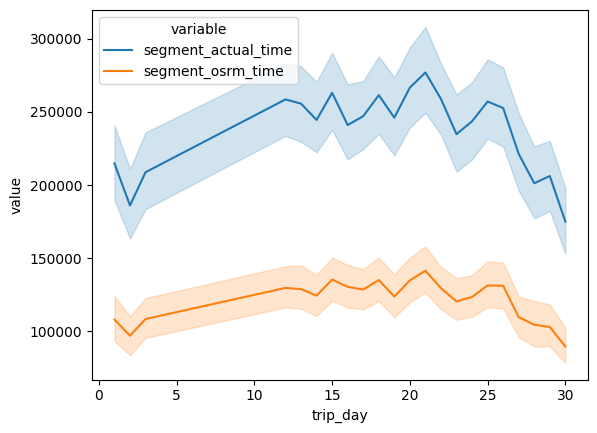

In [ ]:
sns.lineplot(pd.melt(segment_data[['segment_actual_time', 'segment_osrm_time', 'trip_day']], id_vars = ['trip_day']) , x = 'trip_day', y = 'value', estimator = 'sum', hue = 'variable')

In [ ]:
stops_between_states = segment_data[segment_data['route_type'] == 'FTL'].groupby(['trip_uuid'])[['trip_uuid', 'source_state', 'destination_state']].aggregate({'source_state' : 'first', 'destination_state' : 'last' , 'trip_uuid': 'size'})
avg_stops_between_states = stops_between_states.groupby(['source_state', 'destination_state']).mean().sort_values(by = 'trip_uuid', ascending = False).reset_index()

<Axes: xlabel='destination_state', ylabel='source_state'>

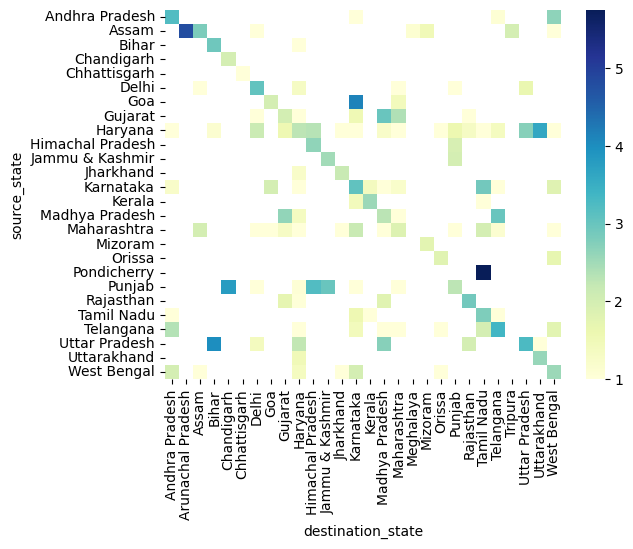

In [ ]:
sns.heatmap(avg_stops_between_states.pivot(index = 'source_state', columns = 'destination_state', values = 'trip_uuid'),cmap='YlGnBu', xticklabels=True, yticklabels=True)

# Business Insights

1. The maximum number of trips are between the states of Delhi and Haryana, with an average of around 380 trips.
2. In terms of city transfers, the maximum number of trips occur between Mumbai City and Bhiwandi, averaging around 345 trips.
3. The total number of trips during the period of 12th September to 3rd October does not vary significantly, remaining in the region of around 1000 to 2300 trips per day. However, a significant decrease in the number of trips is observed from 25th September to 30th September, where the number of trips dropped from 1300 per day to around 900 per day.
4. The number of trips, with respect to FTL and carting route types, does not show a significant difference.
5. The maximum number of trips originate from Maharashtra, followed by Karnataka. Similarly, the maximum number of destinations are in the states of Karnataka and Maharashtra.
6. In respect to the route type, FTL type of deliveries travel a distance of 90,000 on average, whereas carting type deliveries average around 15,000 kilometres.
7. The speed at which the deliveries are made remains consistent throughout the month for FTL deliveries. However, delivery speeds for the carting type vary between days during the month.
8. The OSRM distance calculated for the trip is higher than the actual distance, whereas the OSRM time calculated is actually less than the actual time.
9. The average number of stops between interstate deliveries is highest from Tamil Nadu to Pondicherry, followed by deliveries from Assam to Arunachal Pradesh.

# Business Recommendation

1. **Optimize Routes:** Given that the maximum number of trips occur between Delhi and Haryana, and between Mumbai City and Bhiwandi, it would be beneficial to optimize routes and schedules for these high-traffic areas to increase efficiency and potentially reduce costs.

2. **Analyze Trip Decrease:** The significant decrease in the number of trips from 25th September to 30th September needs to be investigated. Understanding the cause of this decrease could help prevent similar occurrences in the future and maintain a steady flow of deliveries.

3. **Focus on Key States:** With Maharashtra and Karnataka being the origin of most trips and also the destination of most trips, these states should be the focus of any expansion or resource allocation efforts.

4. **Improve Distance and Time Estimation:** The discrepancy between the OSRM calculated distance/time and the actual distance/time indicates a need for improved estimation algorithms. This could lead to more accurate planning and scheduling, ultimately improving delivery efficiency.

5. **Examine Stop Locations:** The high number of stops between interstate deliveries from Tamil Nadu to Pondicherry, and from Assam to Arunachal Pradesh, suggests that these routes may be more complex or face more challenges. It would be beneficial to examine these routes and stops more closely to identify any potential issues or areas for improvement. This could help streamline the delivery process and improve efficiency on these routes.